In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
import os

In [260]:
sns.set_style("whitegrid")
sns.set_palette('rocket')

# BASIC EVALS

In [50]:
def get_means(model, loc, explicit_country, eval):
    path = f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/{model}-{loc}-{explicit_country}-20-1.0'
    
    means = [[], []]
    
    for i in range(1, 21):
        try:
            means[0].append(np.load(f'{path}/run{i}_fixed/{eval}_move1.npy').mean())
            means[1].append(np.load(f'{path}/run{i}_fixed/{eval}_move2.npy').mean())
        except:
            pass

    return means

In [55]:
gpt35t_free_False_bert = get_means('gpt3.5turbo', 'free', False, 'bert')
gpt35t_free_True_bert = get_means('gpt3.5turbo', 'free', True, 'bert')
gpt4_free_False_bert = get_means('gpt4', 'free', False, 'bert')
gpt4_free_True_bert = get_means('gpt4', 'free', True, 'bert')

In [56]:
gpt35t_free_False_bidir = get_means('gpt3.5turbo', 'free', False, 'bidir')
gpt35t_free_True_bidir = get_means('gpt3.5turbo', 'free', True, 'bidir')
gpt4_free_False_bidir = get_means('gpt4', 'free', False, 'bidir')
gpt4_free_True_bidir = get_means('gpt4', 'free', True, 'bidir')

In [60]:
gpt35t_rank_False_kendall = get_means('gpt3.5turbo', 'rank', False, 'kendall')
gpt35t_rank_True_kendall = get_means('gpt3.5turbo', 'rank', True, 'kendall')
gpt4_rank_False_kendall = get_means('gpt4', 'rank', False, 'kendall')
gpt4_rank_True_kendall = get_means('gpt4', 'rank', True, 'kendall')

In [61]:
gpt35t_rank_False_spearman = get_means('gpt3.5turbo', 'rank', False, 'spearman')
gpt35t_rank_True_spearman = get_means('gpt3.5turbo', 'rank', True, 'spearman')
gpt4_rank_False_spearman = get_means('gpt4', 'rank', False, 'spearman')
gpt4_rank_True_spearman = get_means('gpt4', 'rank', True, 'spearman')

In [62]:
gpt35t_rank_False_hamming = get_means('gpt3.5turbo', 'rank', False, 'hamming')
gpt35t_rank_True_hamming = get_means('gpt3.5turbo', 'rank', True, 'hamming')
gpt4_rank_False_hamming = get_means('gpt4', 'rank', False, 'hamming')
gpt4_rank_True_hamming = get_means('gpt4', 'rank', True, 'hamming')

# RANK PLOTTING

In [68]:
all_kendall = pd.DataFrame(
    [
        gpt35t_rank_False_kendall[0], gpt35t_rank_False_kendall[1],
        gpt35t_rank_True_kendall[0], gpt35t_rank_True_kendall[1],
        gpt4_rank_False_kendall[0], gpt4_rank_False_kendall[1],
        gpt4_rank_True_kendall[0], gpt4_rank_True_kendall[1],
    ]
).T

In [69]:
all_kendall.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [70]:
all_kendall = all_kendall.fillna(all_kendall.mean()) # fills nan values with mean of column

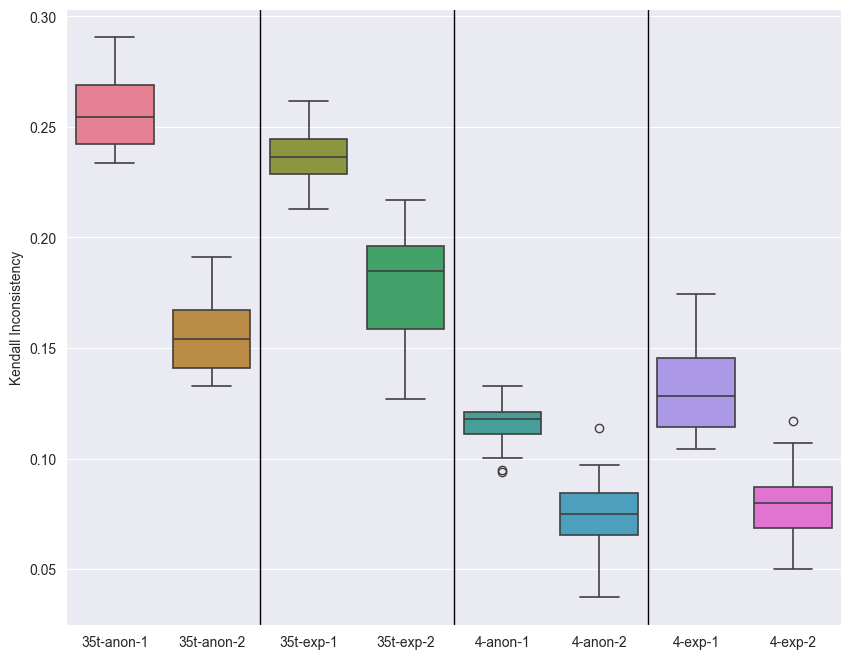

In [71]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_kendall, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

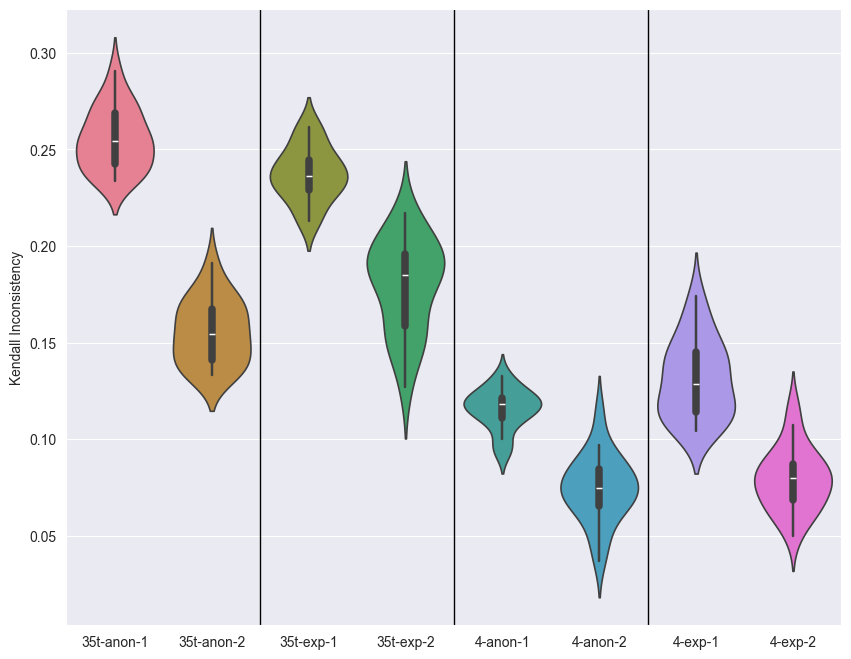

In [72]:
plt.figure(figsize=(10, 8))
sns.violinplot(all_kendall, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [73]:
all_spearman = pd.DataFrame(
    [
        gpt35t_rank_False_spearman[0], gpt35t_rank_False_spearman[1],
        gpt35t_rank_True_spearman[0], gpt35t_rank_True_spearman[1],
        gpt4_rank_False_spearman[0], gpt4_rank_False_spearman[1],
        gpt4_rank_True_spearman[0], gpt4_rank_True_spearman[1],
    ]
).T

In [74]:
all_spearman.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [75]:
all_spearman = all_spearman.fillna(all_spearman.mean()) # fills nan values with mean of column

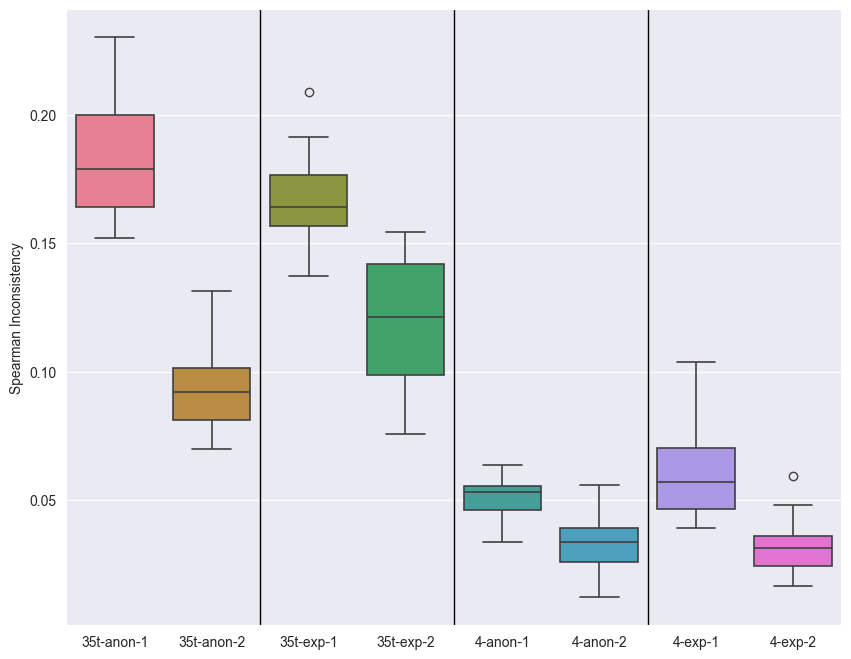

In [76]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_spearman, linewidth=1.2)
plt.ylabel('Spearman Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [81]:
all_hamming = pd.DataFrame(
    [
        gpt35t_rank_False_hamming[0], gpt35t_rank_False_hamming[1],
        gpt35t_rank_True_hamming[0], gpt35t_rank_True_hamming[1],
        gpt4_rank_False_hamming[0], gpt4_rank_False_hamming[1],
        gpt4_rank_True_hamming[0], gpt4_rank_True_hamming[1],
    ]
).T

In [82]:
all_hamming.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [83]:
all_hamming = all_hamming.fillna(all_hamming.mean()) # fills nan values with mean of column

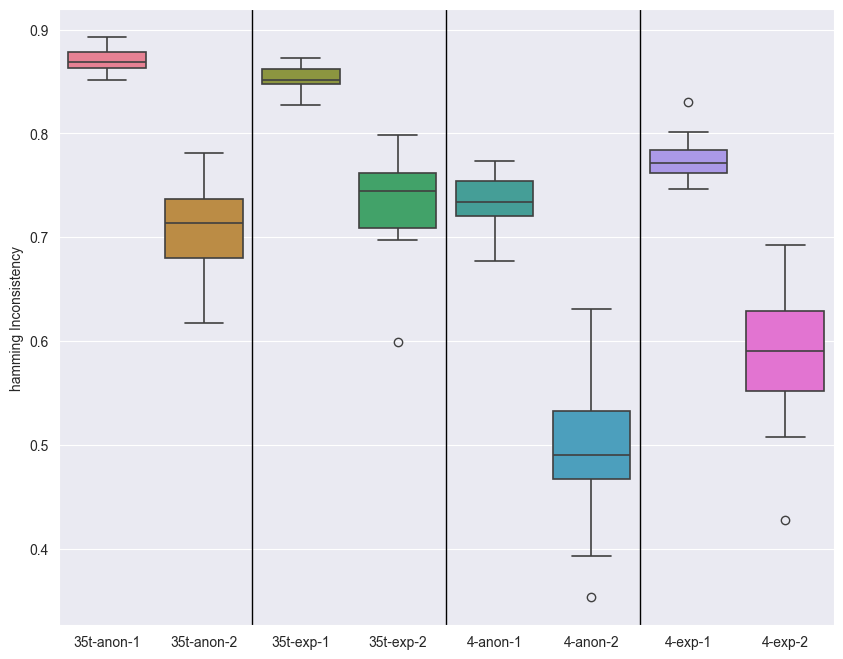

In [85]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_hamming, linewidth=1.2)
plt.ylabel('hamming Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

# BERT PLOTTING

In [86]:
all_bert = pd.DataFrame(
    [
        gpt35t_free_False_bert[0], gpt35t_free_False_bert[1],
        gpt35t_free_True_bert[0], gpt35t_free_True_bert[1],
        gpt4_free_False_bert[0], gpt4_free_False_bert[1],
        gpt4_free_True_bert[0], gpt4_free_True_bert[1],
    ]
).T

In [87]:
all_bert.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

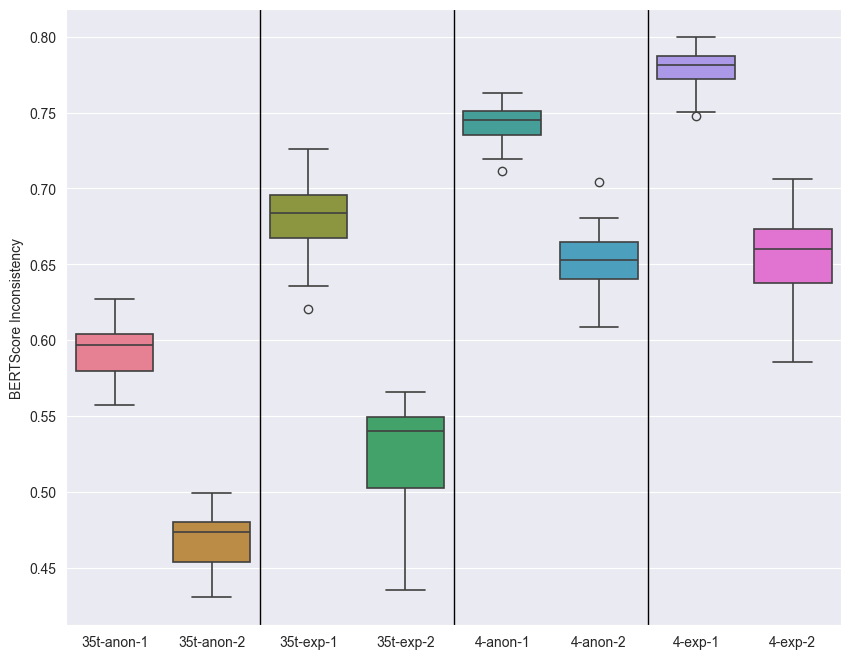

In [88]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_bert, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

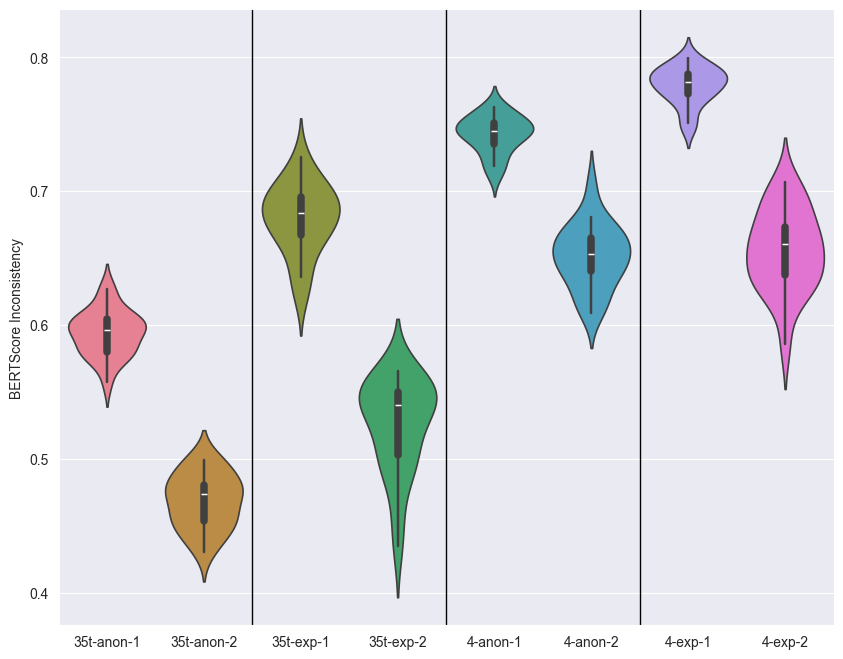

In [89]:
plt.figure(figsize=(10, 8))
sns.violinplot(all_bert, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [90]:
all_bidir = pd.DataFrame(
    [
        gpt35t_free_False_bidir[0], gpt35t_free_False_bidir[1],
        gpt35t_free_True_bidir[0], gpt35t_free_True_bidir[1],
        gpt4_free_False_bidir[0], gpt4_free_False_bidir[1],
        gpt4_free_True_bidir[0], gpt4_free_True_bidir[1],
    ]
).T

In [92]:
all_bidir.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

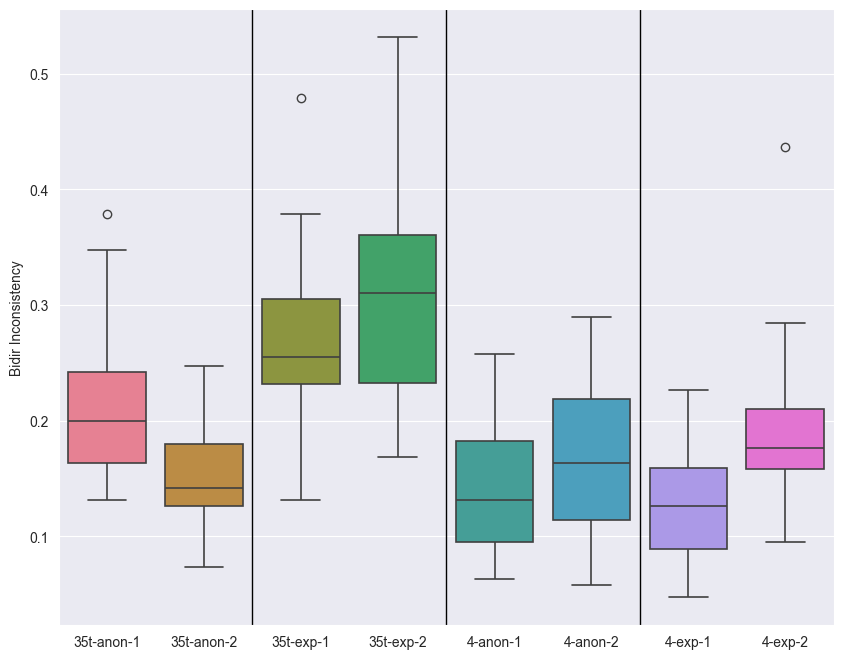

In [93]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_bidir, linewidth=1.2)
plt.ylabel('Bidir Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [110]:
np.load('')

[0.21052631578947367,
 0.13157894736842105,
 0.4789473684210526,
 0.3105263157894737,
 0.2578947368421053,
 0.30526315789473685,
 0.21578947368421053,
 0.14736842105263157,
 0.25263157894736843,
 0.37894736842105264,
 0.24210526315789474,
 0.24210526315789474,
 0.3263157894736842,
 0.29473684210526313,
 0.2578947368421053,
 0.18947368421052632,
 0.30526315789473685,
 0.24210526315789474,
 0.23684210526315788,
 0.26842105263157895]

# BERTScore FIXED

In [80]:
def get_means(path, fixed):
    means = [[], []]

    for i in range(1, 21):
        loaded_berts = np.load(f'{path}/run{i}{fixed}/run{i}_berts.npz')
        m1 = loaded_berts['move1']
        m2 = loaded_berts['move2']
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

In [81]:
claude_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-False-20-1.0/main', '_fixed') 
claude_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-True-20-1.0/main', '')
gpt35_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-False-20-1.0/main', '_fixed')
gpt35_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-True-20-1.0/main', '')
gpt4_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-False-20-1.0/main', '_fixed')
gpt4_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-True-20-1.0/main', '')
gpt4o_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-free-False-20-1.0/main', '')
gpt4o_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-free-True-20-1.0/main', '')
gpt4omini_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-free-False-20-1.0/main', '')
gpt4omini_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-free-True-20-1.0/main', '')

In [272]:
everything_free = pd.DataFrame([
    claude_anon[0], claude_anon[1],
    claude_exp[0], claude_exp[1],
    gpt35_anon[0], gpt35_anon[1],
    gpt35_exp[0], gpt35_exp[1],
    gpt4_anon[0], gpt4_anon[1],
    gpt4_exp[0], gpt4_exp[1],
    gpt4o_anon[0], gpt4o_anon[1],
    gpt4o_exp[0], gpt4o_exp[1],
    gpt4omini_anon[0], gpt4omini_anon[1],
    gpt4omini_exp[0], gpt4omini_exp[1]
]).T

everything_free.columns = [
    'c-a-1', 'c-a-2',
    'c-exp-1', 'c-exp-2',
    'gpt35-a-1', 'gpt35-a-2',
    'gpt35-exp-1', 'gpt35-exp-2',
    'gpt4-a-1', 'gpt4-a-2',
    'gpt4-exp-1', 'gpt4-exp-2',
    'gpt4o-a-1', 'gpt4o-a-2',
    'gpt4o-exp-1', 'gpt4o-exp-2',
    'gpt4omini-a-1', 'gpt4omini-a-2',
    'gpt4omini-exp-1', 'gpt4omini-exp-2',
]

In [273]:
everything_free

,c-a-1,c-a-2,c-exp-1,c-exp-2,gpt35-a-1,gpt35-a-2,gpt35-exp-1,gpt35-exp-2,gpt4-a-1,gpt4-a-2,gpt4-exp-1,gpt4-exp-2,gpt4o-a-1,gpt4o-a-2,gpt4o-exp-1,gpt4o-exp-2,gpt4omini-a-1,gpt4omini-a-2,gpt4omini-exp-1,gpt4omini-exp-2
0,0.602840,0.472521,0.604870,0.374881,0.588776,0.482067,0.668411,0.431322,0.718185,0.638835,0.708973,0.613509,0.670693,0.558443,0.627771,0.535501,0.586507,0.467827,0.600037,0.525729
1,0.587563,0.474181,0.566833,0.325706,0.579724,0.504388,0.644892,0.487676,0.714248,0.623808,0.715615,0.652814,0.661521,0.577067,0.644566,0.554760,0.608716,0.523398,0.563083,0.501373
2,0.585428,0.436464,0.597583,0.384739,0.579137,0.416993,0.610080,0.515286,0.701615,0.656255,0.708567,0.609741,0.670286,0.589686,0.638673,0.554255,0.568662,0.511796,0.555371,0.488374
3,0.570553,0.432218,0.569157,0.364641,0.582504,0.484922,0.597384,0.505214,0.708453,0.631635,0.694918,0.671895,0.653112,0.548878,0.615033,0.557767,0.563158,0.514783,0.601819,0.510678
4,0.577045,0.436403,0.594787,0.366239,0.570683,0.450486,0.641493,0.510783,0.700711,0.645645,0.714483,0.580840,0.661162,0.540933,0.635423,0.569952,0.588888,0.488874,0.572453,0.495663
5,0.578063,0.475122,0.568635,0.350610,0.597853,0.485270,0.621257,0.500956,0.684785,0.655024,0.722239,0.646322,0.684041,0.544038,0.615158,0.556302,0.584658,0.503368,0.585634,0.472694
6,0.572134,0.460063,0.567066,0.357607,0.607458,0.469375,0.622818,0.447220,0.683548,0.635008,0.674338,0.624486,0.662313,0.605822,0.645738,0.548582,0.599945,0.478393,0.575807,0.482602
7,0.571809,0.438261,0.577859,0.359131,0.581588,0.503727,0.654438,0.464176,0.702223,0.602589,0.703435,0.612539,0.657209,0.582935,0.618362,0.534552,0.566564,0.470391,0.589535,0.483455
8,0.597133,0.455942,0.591395,0.372346,0.592081,0.458995,0.622869,0.494315,0.703031,0.653624,0.723219,0.626170,0.658057,0.601994,0.644896,0.541582,0.576373,0.502522,0.562928,0.470986
9,0.573423,0.437289,0.581566,0.343944,0.570248,0.489775,0.585651,0.490591,0.690815,0.642268,0.709846,0.649356,0.653855,0.541858,0.636232,0.535494,0.609102,0.510708,0.588383,0.471221


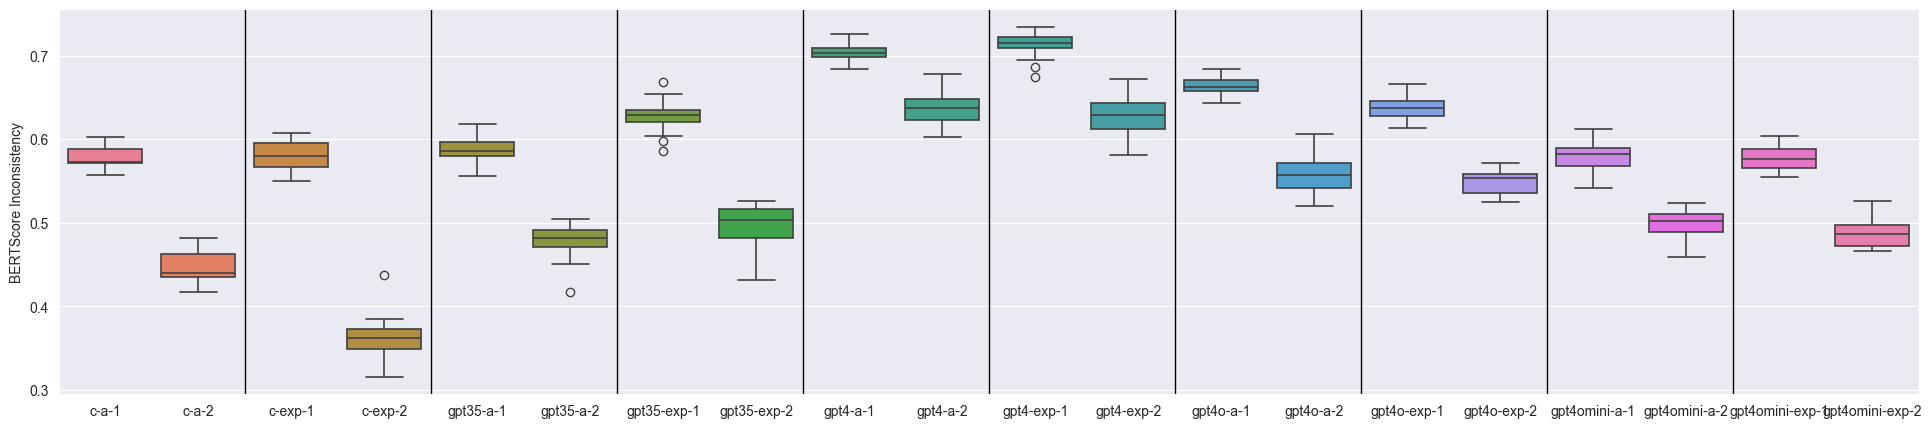

In [84]:
plt.figure(figsize=(24, 5))
sns.boxplot(everything_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5, 11.5, 13.5, 15.5, 17.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [85]:
explicit_comps_free = everything_free[['c-exp-1', 'c-exp-2', 'gpt35-exp-1', 'gpt35-exp-2', 'gpt4-exp-1', 'gpt4-exp-2', 'gpt4o-exp-1', 'gpt4o-exp-2', 'gpt4omini-exp-1', 'gpt4omini-exp-2']]

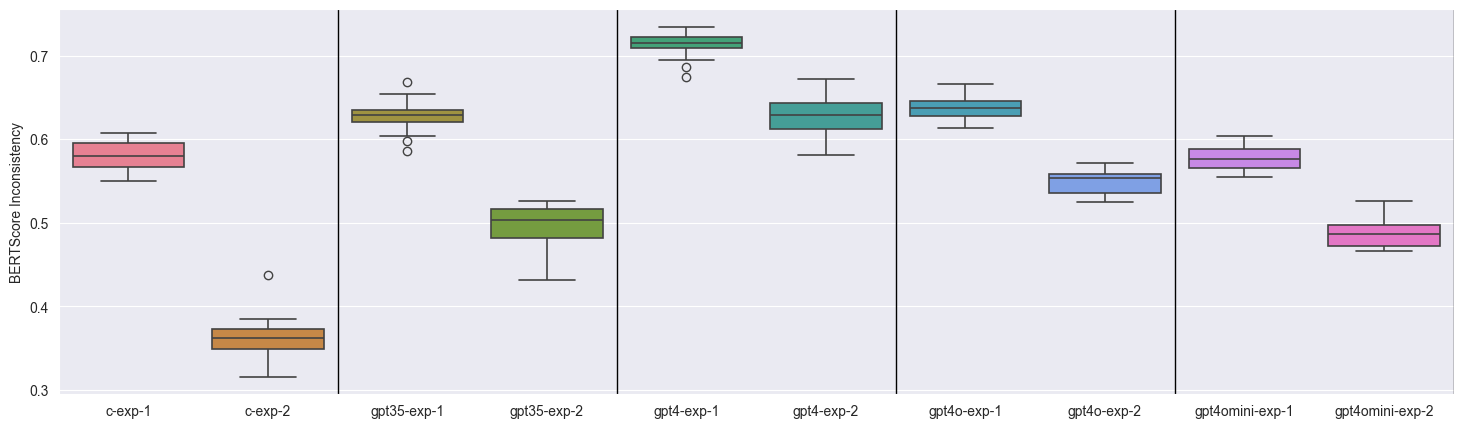

In [86]:
plt.figure(figsize=(18, 5))
sns.boxplot(explicit_comps_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [87]:
anon_comps_free = everything_free[['c-a-1', 'c-a-2', 'gpt35-a-1', 'gpt35-a-2', 'gpt4-a-1', 'gpt4-a-2', 'gpt4o-a-1', 'gpt4o-a-2', 'gpt4omini-a-1', 'gpt4omini-a-2']]

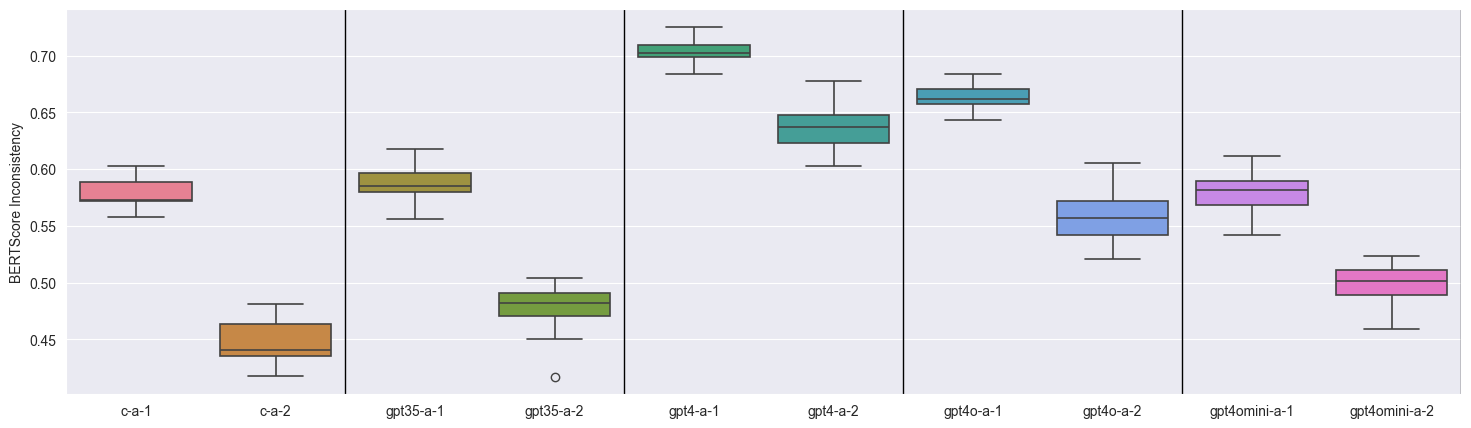

In [88]:
plt.figure(figsize=(18, 5))
sns.boxplot(anon_comps_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [89]:
move1_comps_free = everything_free[['c-a-1', 'c-exp-1', 'gpt35-a-1', 'gpt35-exp-1', 'gpt4-a-1', 'gpt4-exp-1', 'gpt4o-a-1', 'gpt4o-exp-1', 'gpt4omini-a-1', 'gpt4omini-exp-1']]

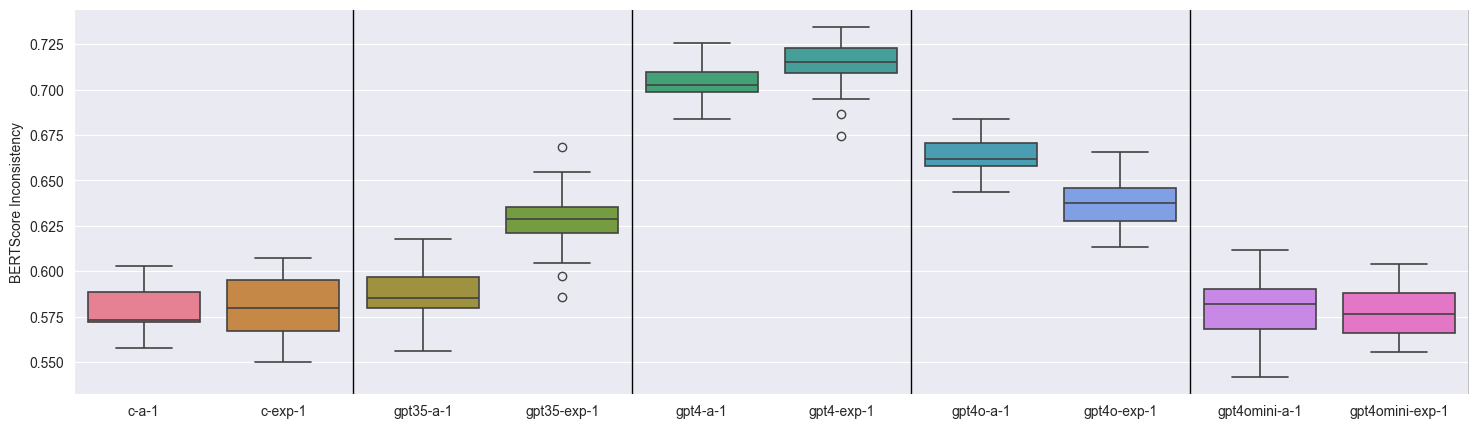

In [90]:
plt.figure(figsize=(18, 5))
sns.boxplot(move1_comps_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [91]:
move2_comps_free = everything_free[['c-a-2', 'c-exp-2', 'gpt35-a-2', 'gpt35-exp-2', 'gpt4-a-2', 'gpt4-exp-2', 'gpt4o-a-2', 'gpt4o-exp-2', 'gpt4omini-a-2', 'gpt4omini-exp-2']]

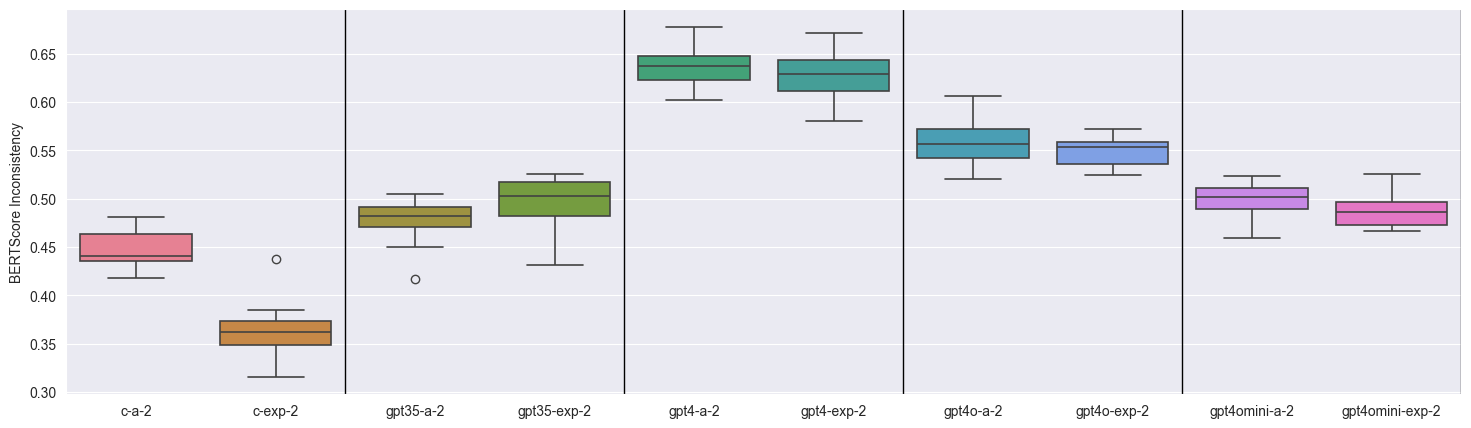

In [92]:
plt.figure(figsize=(18, 5))
sns.boxplot(move2_comps_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

### Claude 3.5 sonnet anonymous lines

In [127]:
everything_free[['c-a-1', 'c-a-2']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
c-a-1,0.602840,0.587563,0.585428,0.570553,0.577045,0.578063,0.572134,0.571809,0.597133,0.573423,0.568850,0.572274,0.602568,0.557478,0.571769,0.572580,0.572082,0.572222,0.590955,0.597169
c-a-2,0.472521,0.474181,0.436464,0.432218,0.436403,0.475122,0.460063,0.438261,0.455942,0.437289,0.460809,0.442206,0.425985,0.428080,0.433648,0.417571,0.436370,0.481574,0.459611,0.470091


In [136]:
purples = sns.color_palette("Purples", 20) # Adjust the number 2 to the number of lines you have

In [338]:
def plot_lines(df, label_name, cols, colors, main_color, plot, first=False):

    interested = df[cols]
    interested.columns = ['Move 1', 'Move 2']

    for i in range(20):
        sns.lineplot(data=interested.T[i],
            lw=1,
            alpha=0.5,
            linestyle='--',
            color=colors[i],
            ax=plot)
    
    mean_line = sns.lineplot(data=[interested['Move 1'].mean(), interested['Move 2'].mean()],
        linewidth=3,
        linestyle='-',
        color=main_color,
        ax=plot)
    
    legend_line = Line2D([0], [0], color=main_color, lw=3)
    plot.legend([legend_line], [label_name], loc='upper right')
    # plt.xlabel('Move 1 to Move 2')
    if first:
        plot.set_ylabel('BERTScore Inconsistency')
    else:
        plot.set_ylabel('')

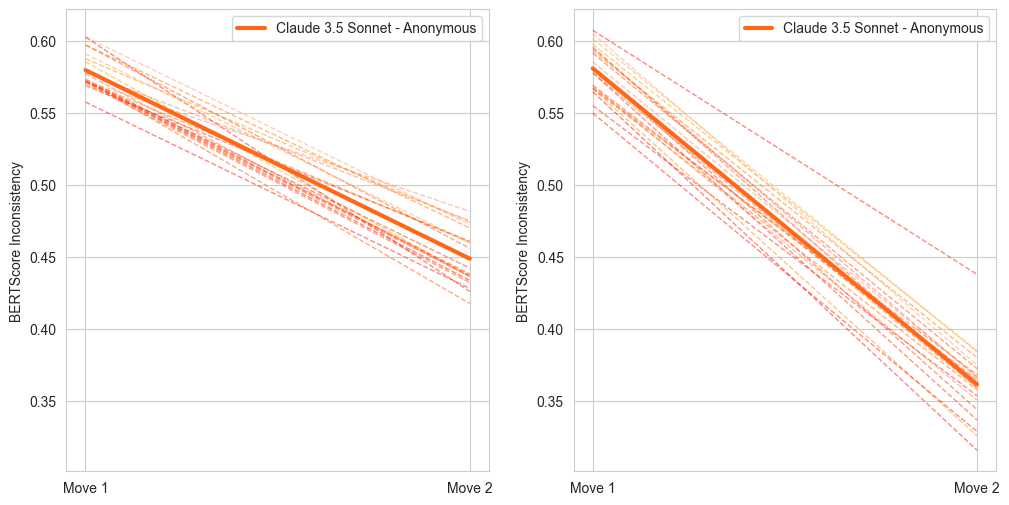

In [321]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.suptitle('')
for ax in axes:
    ax.yaxis.set_tick_params(labelleft=True)
# Define your custom color palette
oranges = [
    '#FFA07A', '#FF8C00', '#FFA500', '#FF4500', '#FF6347',
    '#FF7F50', '#FF6A00', '#FF5E13', '#FF4C00', '#FF3F00',
    '#FF2E00', '#FF2300', '#FF1A00', '#FF1200', '#FF0C00',
    '#FF5800', '#FF5100', '#FF8C69', '#FFA54F', '#FF7600'
]

main_color = '#FF6719'

cols_a =  ['c-a-1', 'c-a-2']
cols_exp = ['c-exp-1', 'c-exp-2']

label_name_anon = 'Claude 3.5 Sonnet - Anonymous'
label_name_exp = 'Claude 3.5 Sonnet - Explicit'

plot_lines(everything_free, label_name, cols_a, oranges, main_color, axes[0])

plot_lines(everything_free, label_name, cols_exp, oranges, main_color, axes[1])



In [345]:
purples = [
    "#800080",  # Purple
    "#8A2BE2",  # Blue Violet
    "#9370DB",  # Medium Purple
    "#7B68EE",  # Medium Slate Blue
    "#6A5ACD",  # Slate Blue
    "#483D8B",  # Dark Slate Blue
    "#9400D3",  # Dark Violet
    "#9932CC",  # Dark Orchid
    "#BA55D3",  # Medium Orchid
    "#DA70D6",  # Orchid
    "#D8BFD8",  # Thistle
    "#DDA0DD",  # Plum
    "#EE82EE",  # Violet
    "#FF00FF",  # Fuchsia
    "#C71585",  # Medium Violet Red
    "#DB7093",  # Pale Violet Red
    "#E6E6FA",  # Lavender
    "#8B008B",  # Dark Magenta
    "#FF1493",  # Deep Pink
    "#FFB6C1"   # Light Pink
]

blacks = [
    "#000000",  # Black
    "#0C0C0C",  # Almost Black
    "#1C1C1C",  # Dark Charcoal
    "#2B2B2B",  # Dark Gray
    "#3D3D3D",  # Jet Black
    "#4E4E4E",  # Onyx
    "#5F5F5F",  # Dim Gray
    "#6F6F6F",  # Dark Slate Gray
    "#7F7F7F",  # Gray
    "#8F8F8F",  # Slate Gray
    "#9F9F9F",  # Light Charcoal
    "#AFAFAF",  # Silver
    "#BFBFBF",  # Gray Web
    "#CFCFCF",  # Gray X11
    "#DFDFDF",  # Gainsboro
    "#EFEFEF",  # Light Gray
    "#F7F7F7",  # White Smoke
    "#080808",  # Rich Black
    "#1A1A1A",  # Eerie Black
    "#292929",  # Outer Space
]

blues = [
    "#0000FF",  # Blue
    "#0000CD",  # Medium Blue
    "#1E90FF",  # Dodger Blue
    "#6495ED",  # Cornflower Blue
    "#4169E1",  # Royal Blue
    "#4682B4",  # Steel Blue
    "#5F9EA0",  # Cadet Blue
    "#00BFFF",  # Deep Sky Blue
    "#87CEEB",  # Sky Blue
    "#87CEFA",  # Light Sky Blue
    "#ADD8E6",  # Light Blue
    "#B0E0E6",  # Powder Blue
    "#AFEEEE",  # Pale Turquoise
    "#48D1CC",  # Medium Turquoise
    "#40E0D0",  # Turquoise
    "#00CED1",  # Dark Turquoise
    "#20B2AA",  # Light Sea Green
    "#5F9EA0",  # Cadet Blue
    "#4682B4",  # Steel Blue
    "#1E90FF"   # Dodger Blue
]



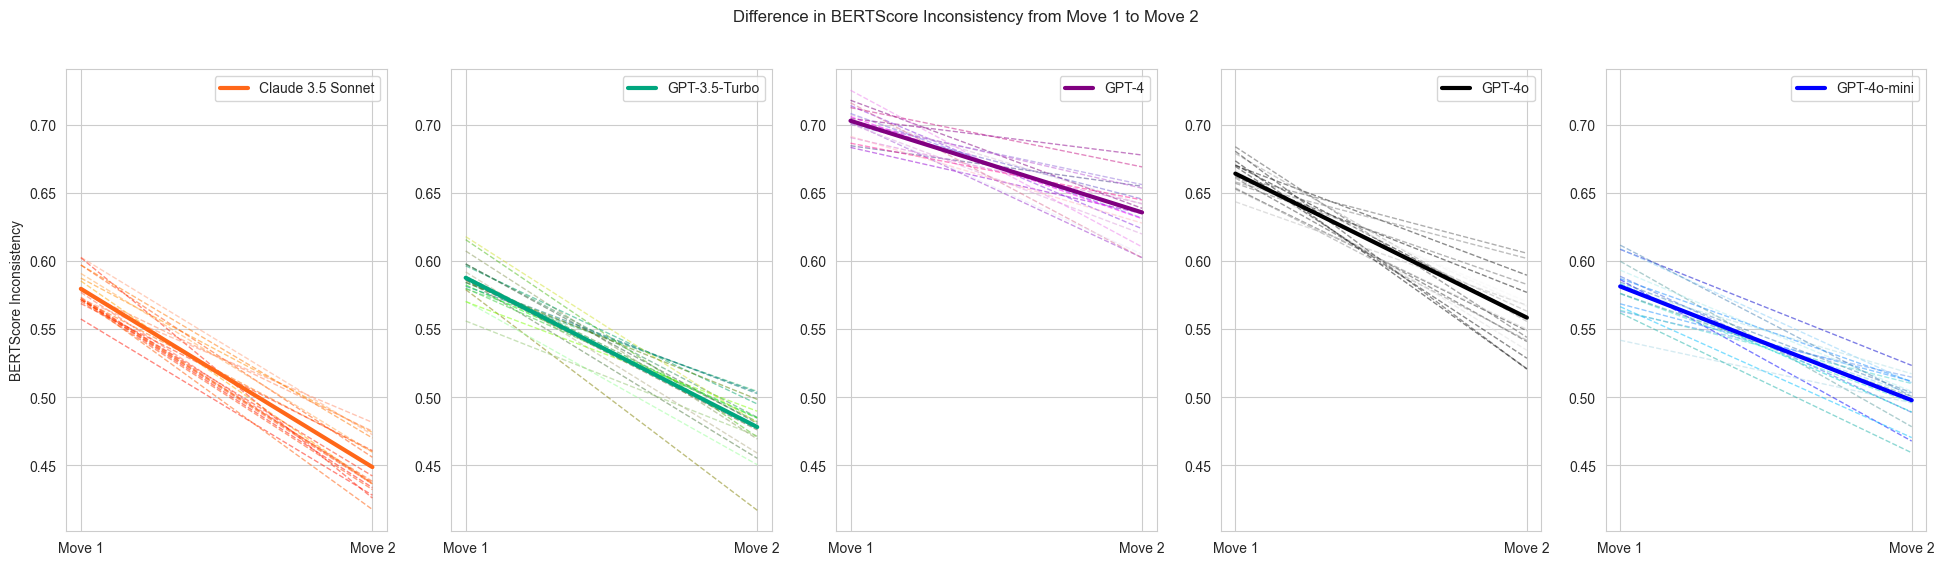

In [349]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(24, 6))
fig.suptitle('Difference in BERTScore Inconsistency from Move 1 to Move 2 (Anonymous)')
for i, ax in enumerate(axes):
    ax.yaxis.set_tick_params(labelleft=True)

plot_lines(everything_free, 'Claude 3.5 Sonnet', ['c-a-1', 'c-a-2'], oranges, '#FF6719', axes[0], first=True)

plot_lines(everything_free, 'GPT-3.5-Turbo', ['gpt35-a-1', 'gpt35-a-2'], greens, '#00A67E', axes[1])

plot_lines(everything_free, 'GPT-4', ['gpt4-a-1', 'gpt4-a-2'], purples, '#800080', axes[2])

plot_lines(everything_free, 'GPT-4o', ['gpt4o-a-1', 'gpt4o-a-2'], blacks, '#000000', axes[3])

plot_lines(everything_free, 'GPT-4o-mini', ['gpt4omini-a-1', 'gpt4omini-a-2'], blues, '#0000FF', axes[4])

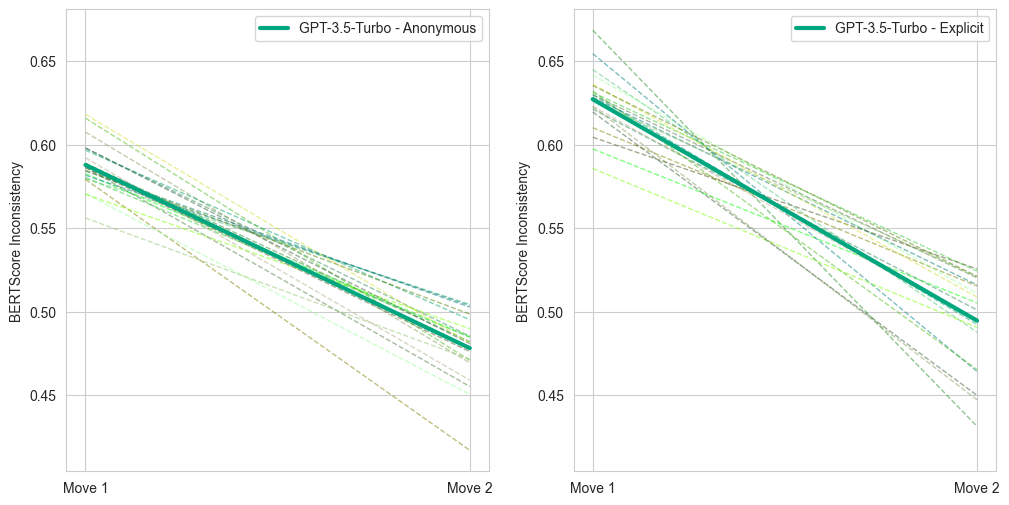

In [329]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.suptitle('')
for ax in axes:
    ax.yaxis.set_tick_params(labelleft=True)
# Define your custom color palette
greens = [
    "#228B22",  # Forest Green
    "#50C878",  # Emerald
    "#808000",  # Olive
    "#00FF00",  # Lime
    "#98FF98",  # Mint
    "#2E8B57",  # Sea Green
    "#8A9A5B",  # Moss Green
    "#008080",  # Teal
    "#B2AC88",  # Sage
    "#7FFF00",  # Chartreuse
    "#00A36C",  # Jade
    "#4CBB17",  # Kelly Green
    "#4F7942",  # Fern Green
    "#355E3B",  # Hunter Green
    "#33CC33",  # Shamrock Green
    "#01796F",  # Pine Green
    "#4B5320",  # Army Green
    "#D1E231",  # Pear
    "#93C572",  # Pistachio
    "#568203",  # Avocado
    "#00A67E"   # ChatGPT Green
]
main_color = '#00A67E'

cols_a =  ['gpt35-a-1', 'gpt35-a-2']
cols_exp = ['gpt35-exp-1', 'gpt35-exp-2']

label_name_anon = 'GPT-3.5-Turbo - Anonymous'
label_name_exp = 'GPT-3.5-Turbo - Explicit'

plot_lines(everything_free, label_name_anon, cols_a, greens, main_color, axes[0])

plot_lines(everything_free, label_name_exp, cols_exp, greens, main_color, axes[1])



# RANK Score FIXED

In [41]:
def get_means(path, fixed):
    means = [[], []]

    for i in range(1, 21):
        loaded_ranks = np.load(f'{path}/run{i}{fixed}/run{i}_ranks.npz')
        m1 = loaded_ranks['kendall_move1']
        m2 = loaded_ranks['kendall_move2']
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

In [43]:
claude_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-rank-False-20-1.0/main', '_fixed') 
claude_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-rank-True-20-1.0/main', '')
gpt35_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-False-20-1.0/main', '_fixed')
gpt35_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-True-20-1.0/main', '')
gpt4_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-False-20-1.0/main', '_fixed')
gpt4_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-True-20-1.0/main', '')
gpt4o_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-rank-False-20-1.0/main', '')
gpt4o_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-rank-True-20-1.0/main', '')
gpt4omini_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-rank-False-20-1.0/main', '')
gpt4omini_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-rank-True-20-1.0/main', '')

In [44]:
everything = pd.DataFrame([
    claude_anon[0], claude_anon[1],
    claude_exp[0], claude_exp[1],
    gpt35_anon[0], gpt35_anon[1],
    gpt35_exp[0], gpt35_exp[1],
    gpt4_anon[0], gpt4_anon[1],
    gpt4_exp[0], gpt4_exp[1],
    gpt4o_anon[0], gpt4o_anon[1],
    gpt4o_exp[0], gpt4o_exp[1],
    gpt4omini_anon[0], gpt4omini_anon[1],
    gpt4omini_exp[0], gpt4omini_exp[1],

]).T

everything.columns = [
    'c-a-1', 'c-a-2',
    'c-exp-1', 'c-exp-2',
    'gpt35-a-1', 'gpt35-a-2',
    'gpt35-exp-1', 'gpt35-exp-2',
    'gpt4-a-1', 'gpt4-a-2',
    'gpt4-exp-1', 'gpt4-exp-2',
    'gpt4o-a-1', 'gpt4o-a-2',
    'gpt4o-exp-1', 'gpt4o-exp-2',
    'gpt4omini-a-1', 'gpt4omini-a-2',
    'gpt4omini-exp-1', 'gpt4omini-exp-2',
]

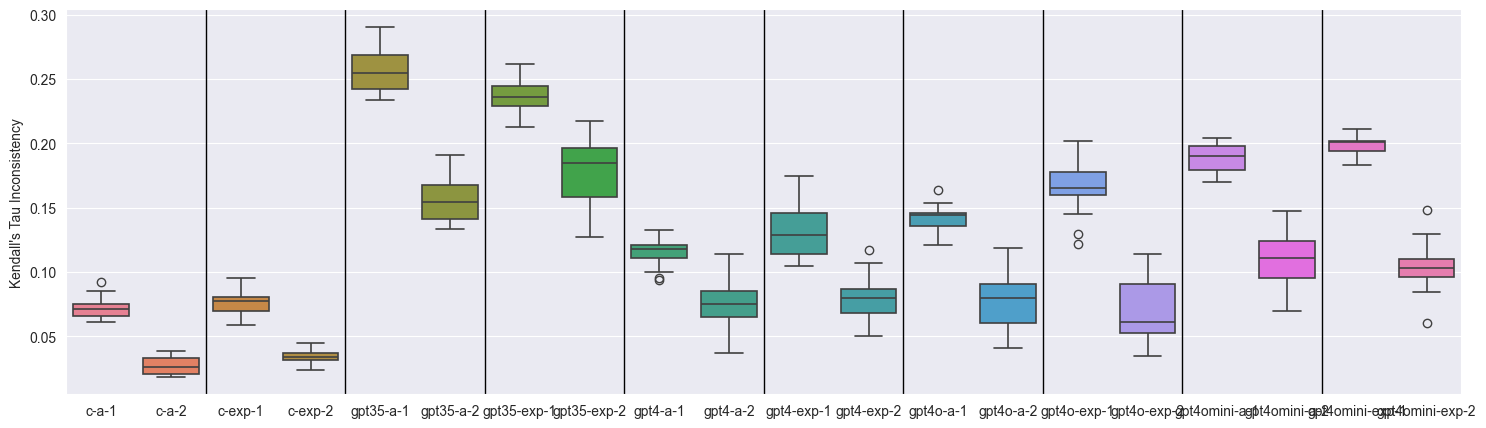

In [47]:
plt.figure(figsize=(18, 5))
sns.boxplot(everything, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5, 11.5, 13.5, 15.5, 17.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [48]:
explicit_comps = everything[['c-exp-1', 'c-exp-2', 'gpt35-exp-1', 'gpt35-exp-2', 'gpt4-exp-1', 'gpt4-exp-2', 'gpt4o-exp-1', 'gpt4o-exp-2', 'gpt4omini-exp-1', 'gpt4omini-exp-2']]

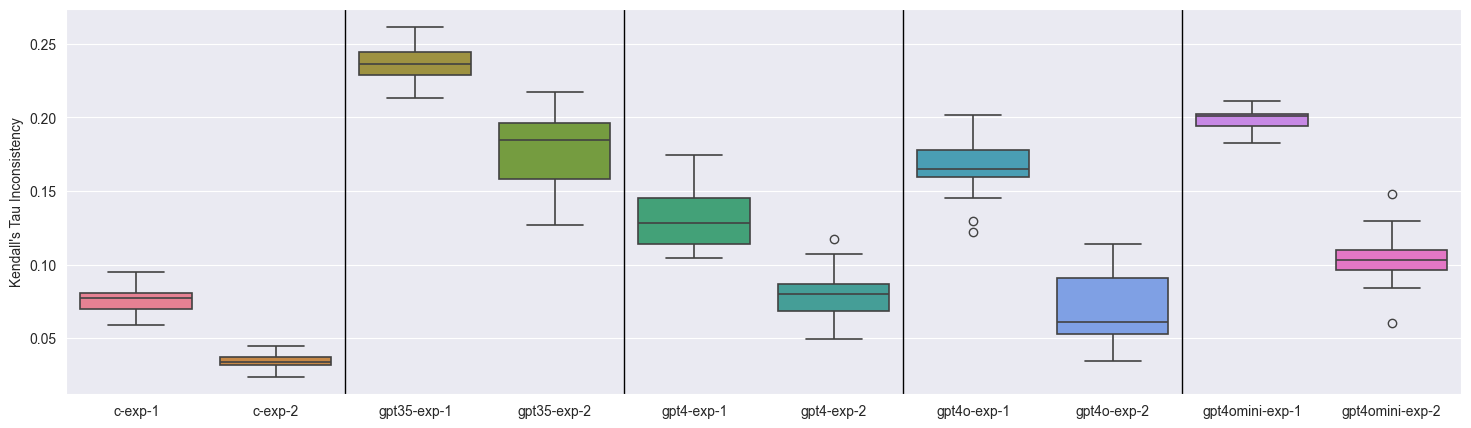

In [50]:
plt.figure(figsize=(18, 5))
sns.boxplot(explicit_comps, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [51]:
anon_comps = everything[['c-a-1', 'c-a-2', 'gpt35-a-1', 'gpt35-a-2', 'gpt4-a-1', 'gpt4-a-2', 'gpt4o-a-1', 'gpt4o-a-2', 'gpt4omini-a-1', 'gpt4omini-a-2']]

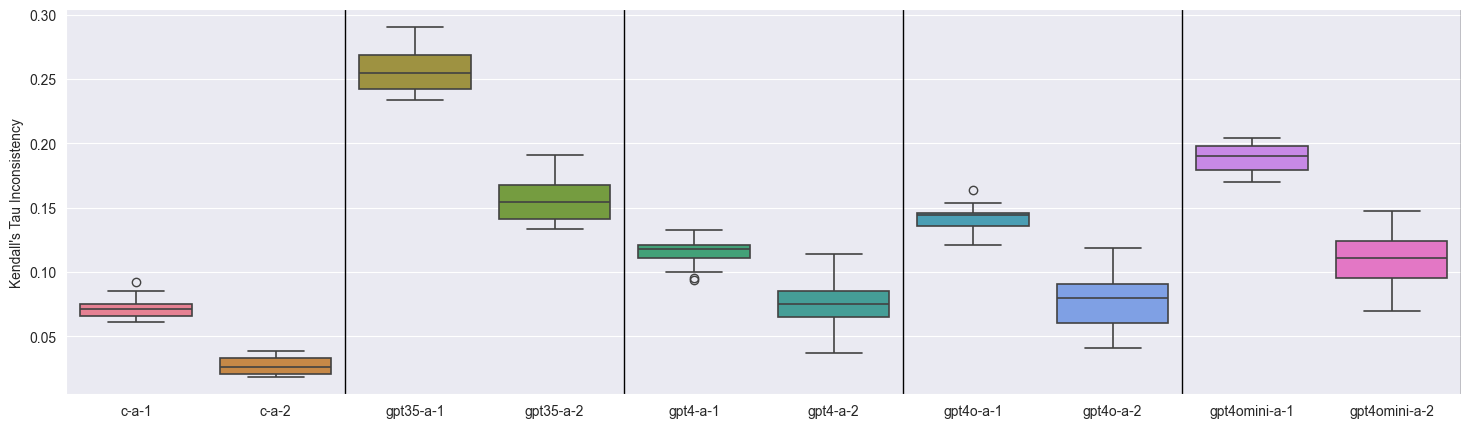

In [53]:
plt.figure(figsize=(18, 5))
sns.boxplot(anon_comps, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [56]:
move1_comps = everything[['c-a-1', 'c-exp-1', 'gpt35-a-1', 'gpt35-exp-1', 'gpt4-a-1', 'gpt4-exp-1', 'gpt4o-a-1', 'gpt4o-exp-1', 'gpt4omini-a-1', 'gpt4omini-exp-1']]

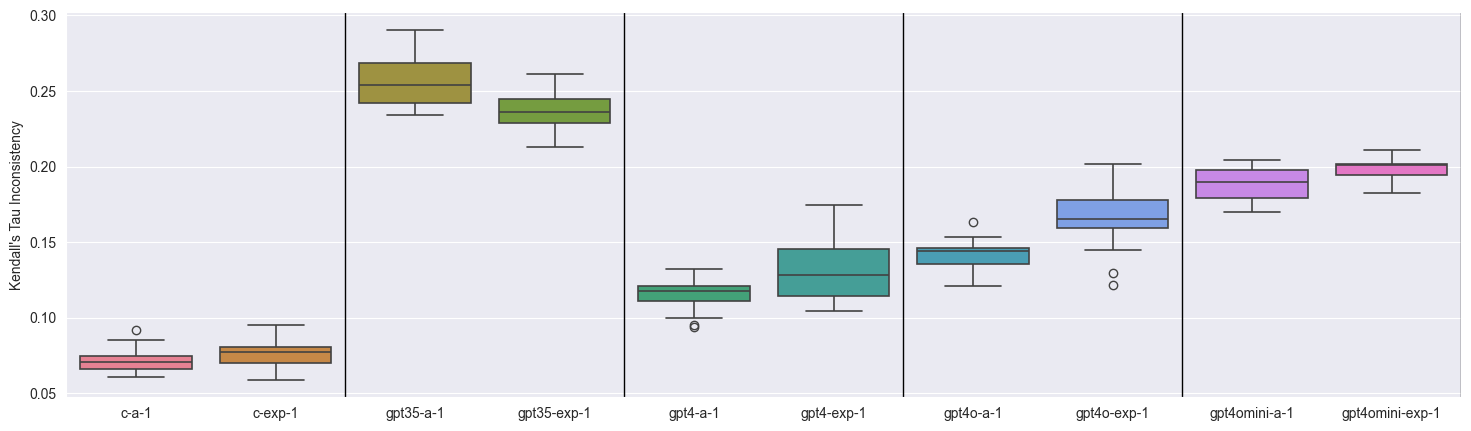

In [57]:
plt.figure(figsize=(18, 5))
sns.boxplot(move1_comps, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [59]:
move2_comps = everything[['c-a-2', 'c-exp-2', 'gpt35-a-2', 'gpt35-exp-2', 'gpt4-a-2', 'gpt4-exp-2', 'gpt4o-a-2', 'gpt4o-exp-2', 'gpt4omini-a-2', 'gpt4omini-exp-2']]

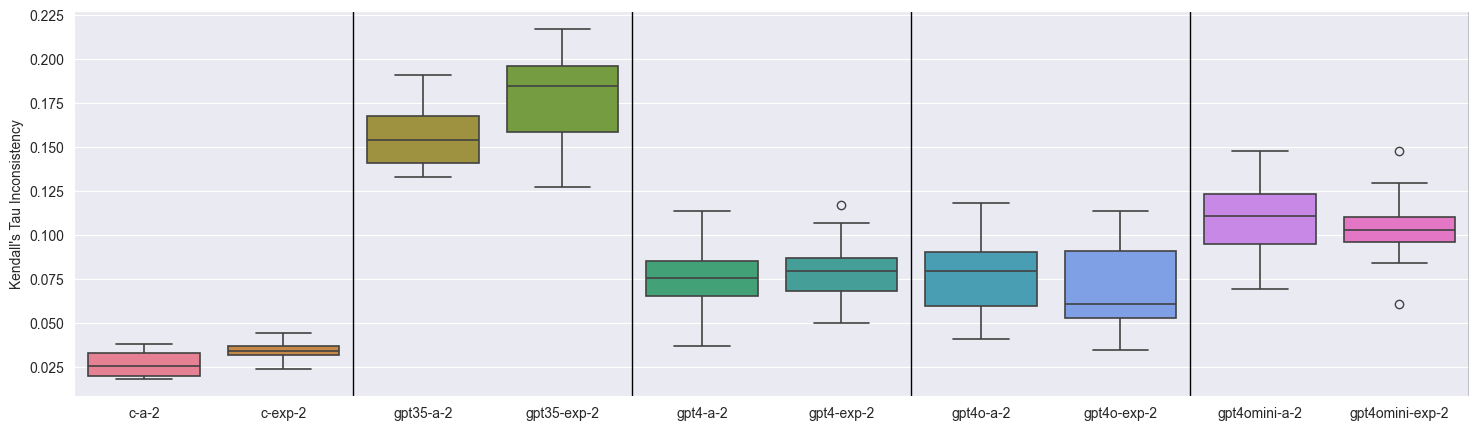

In [60]:
plt.figure(figsize=(18, 5))
sns.boxplot(move2_comps, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)